# Pandas

Today we are going to start using pandas.  Lets review the libraries or packages and what they have done so far.
1.  We always start byt typing %matploltlib inline.  This is a built in magic command that enables us to plot the data right into our ipython notebook https://ipython.org/ipython-doc/3/interactive/magics.html 
2.  we import matplotlib.pylab as plt.  This turns on all the graphing capabilities and then uses the shorthand plt. for when we call functions from matplotlib
3.  we import numpy as np.  This turns on math functions and we use the shorthand np.
4.  we from scipy we import stats.  scipy gives us a lot of analysis functions and we use linear regression from stats.
5.  Now we are also going to use pandas.  Pandas is database management.  It lets us take complicated datasets and anlyze them.  You can think of it like a supercharged excel where you combine the organization of excel with the power of a programming language.  It can do amazing things and I am still learning every day.  So lets get started!
1.  What is pandas? http://pandas.pydata.org/index.html  and here is the documentation http://pandas.pydata.org/pandas-docs/version/0.15.2/
1.  import pandas as pd!!!!!!
1.  On a final note you can see I made a numbered list in markdown. To do that you type a number a period and then two spaces.


In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

## Importing files
We are going to start by finding our csv file and reading it in

I only want to list the csv files so I can see what I can read in.  so I will do ls \*.csv   the star is a wildcard that means everything and then .csv is only ones that end in .csv.  Today we are going to look at data from well water chemistry in Bangladesh. Specifically arsenic concentrations and if people drink the water.  We will also look at the rest of the chemistry.  We are looking at well water arsenic because drinking water with arsenic has negative long term health impacts.  The US standard for arsenic is 10 ppb or 10 ug/L.  The bangladesh standard is 50 ppb.  Lets see what we can learn!  We are going to try and learn about how many people drink water with 10 or 50 ppb arsenic.  (to show the start I had to type \\*)

In [2]:
pwd

u'C:\\work-teaching\\python\\fall16\\BigDataPython'

In [3]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is D0AD-C6E1

 Directory of C:\work-teaching\python\fall16\BigDataPython

02/24/2015  03:36 PM             1,380 Brian.csv
01/22/2015  06:29 PM         4,093,009 central_park.csv
10/20/2015  10:55 AM             1,642 CoreEM09GC01.csv
11/02/2015  10:34 AM             1,661 CoreEM09GC01-extra-line.csv
03/19/2015  12:38 PM            64,749 fldav_ljo.csv
02/13/2015  04:23 PM             2,180 gdp.csv
08/31/2015  02:29 PM             1,125 gdp_only.csv
08/31/2015  02:26 PM             2,180 gdp2.csv
08/11/2015  04:28 PM             1,999 gdp2015.csv
02/12/2015  04:46 PM             4,841 GDP-Lifespan.csv
03/07/2015  04:01 PM            16,753 Libby_Thesis_Data.csv
02/24/2015  02:04 PM            37,289 mystery.csv
02/23/2015  10:49 PM               102 twoD1.csv
03/27/2015  09:58 AM            53,449 weekly_mlo.csv
10/09/2015  11:37 AM            78,886 well_data.csv
03/26/2015  03:27 PM               128 well_sites.csv
02/27/2015  04

now we read in a well_data.csv.  But I want to use pandas not and not numpy.  

But we are going to read in some data and try to analyze it.  open the well_data.csv.  It is for wells from Bangladesh. every well has an id#, a latitude and longitude, Depth, if people drink it and then some concentration data.  lets use readcsv to get read in.  In Pandas you are trying to get your data into a dataframe which is like an excel sheet.  It will have column titles and an indexed for rows.  It is all about the dataframes.  When using pandas people name things 'df' a lot.  That is shorthand for dataframe.  I am not a good namer..

In [4]:
well_data=pd.read_csv('well_data.csv')

The data is now magically in the computers memory even if we can't see it we can access it!

## This is important.  Your output may not look like my output.  It changes between computers depending on default settings when you installed.  Don't worry.  If you see data of descriptions you are fine.

just typing well_data will give us some descriptions of what we got!  It used the first row for column names!  I used well_data.head() so I would only see a few lines.  The head of the data.  You can also look at .tail().  Or you should just type well_data and see what it gives you!

In [23]:
well_data.head()

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,96.159587,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


type well_data in the next one for a summary.  you might have to type print well_data.  I am not doing it as it wastes a ton of paper.  You try it though!

In [ ]:
well_data

Since we didn't set an index it just numbers each row and calls that the index.  But that doesn't help us.  I think we could set the well_id to the index.  When you look at your data above. see how the numbers on the left have no title but are a little offset.  That is the index.  But what is an index.  I am not sure.  It is sort of like a master column that helps us organize the data.  It will make more sense when we get to timeseries analysis.  That is where pandas shines even more.  But lets set and index and use well_id as that is the most important factor.

In [8]:
well_data=well_data.set_index('Well_ID')

In [9]:
print well_data.head()

           Lat    Lon  Depth Drink           Si         P            S  \
Well_ID                                                                  
2        23.74  90.31     45     Y          NaN       NaN          NaN   
14       23.62  90.60     60     Y          NaN       NaN          NaN   
23       23.94  91.46     60     Y          NaN       NaN          NaN   
83       23.80  91.33     50     Y  48084.33842  0.936358  2085.570979   
84       23.98  90.81    150     Y          NaN       NaN          NaN   

                  Ca        Fe         Ba         Na         Mg   K        Mn  \
Well_ID                                                                         
2                NaN       NaN        NaN        NaN        NaN NaN       NaN   
14               NaN       NaN        NaN        NaN        NaN NaN       NaN   
23               NaN       NaN        NaN        NaN        NaN NaN       NaN   
83       54666.48199  1.260031  96.159587  76.207449  26.104825 NaN  1.01915

we can undue the index

In [10]:
well_data=well_data.reset_index()

In [40]:
well_data.head()  #since we have an index it prints the index name on its own row.

,Lat,Lon,Depth,Drink,Si,P,S,Ca,Fe,Ba,Na,Mg,K,Mn,As,Sr,F,Cl,SO4,Br
Well_ID,,,,,,,,,,,,,,,,,,,,
2,23.74,90.31,45,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,23.62,90.60,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,23.94,91.46,60,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,23.80,91.33,50,Y,48084.33842,0.936358,2085.570979,54666.48199,1.260031,96.159587,76.207449,26.104825,NaN,1.019154,78.97747,253.528674,0.1669,83.0137,5.6188,0.1512
84,23.98,90.81,150,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Or we could just read in the data with the index set.  

In [12]:
well_data=pd.read_csv('well_data.csv',index_col='Well_ID')

If you don't know the column name you can use the column number!

In [13]:
well_data=pd.read_csv('well_data.csv',index_col=0)

## The first great trick of pandas!
The describe function.  It gives you amazing summary statistics lickety-split!

In [14]:
print well_data.describe()

              Lat         Lon       Depth            Si           P  \
count  759.000000  759.000000  759.000000    407.000000  407.000000   
mean    23.789249   90.641199   65.554677  40101.151444    0.809323   
std      0.578493    0.578800   42.186161  10117.680290    0.902860   
min     22.780000   89.610000    0.000000  12605.576700    0.008210   
25%     23.285000   90.155000   45.000000  33200.310900    0.151957   
50%     23.790000   90.650000   50.000000  40021.490000    0.507850   
75%     24.300000   91.130000   70.000000  45369.825000    1.189271   
max     24.770000   91.650000  523.000000  70304.057950    5.477616   

                  S             Ca          Fe          Ba          Na  \
count    407.000000     407.000000  407.000000  407.000000  407.000000   
mean    3407.292389   41129.291921    5.556200   89.078507   29.441511   
std     5364.247733   20161.130827    5.153779   54.172650   17.888604   
min      -41.390000    3577.160000   -0.003680    5.630000    4.

A hint of what is to come!  But we just got all of our summary statistics.  Run this and scroll down.  I didn't run it to save paper.  see what happens!

In [ ]:
well_data.boxplot()

That boxplot was hard to see.  What if we just look at As and Fe?

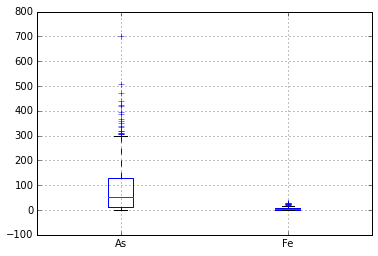

In [17]:
fig,ax=plt.subplots()
well_data.boxplot(column=['As','Fe'],ax=ax)
ax.get_figure().suptitle("") #This line gets rid of text.

this plotting is a little diffrent then how we have been plotting.  Pandas has some built in plotting so you can make some really nice and quick plots. But these plots are a little harder to customize. So we will be doing both types of plotting depending on the goal.  The goal could be a quick view versus a profesional looking plot.  

We can also just get a list of our columns.

In [18]:
well_data.columns

Index([u'Lat', u'Lon', u'Depth', u'Drink', u'Si', u'P', u'S', u'Ca', u'Fe',
       u'Ba', u'Na', u'Mg', u'K', u'Mn', u'As', u'Sr', u'F', u'Cl', u'SO4',
       u'Br'],
      dtype='object')

Remember NaN is not a number.  We are going to use this to our advantage! 

shape still gives us the shape.  We can call it two different ways

In [19]:
well_data.shape

(759, 20)

In [20]:
np.shape(well_data)

(759, 20)

## Stop and think for a second.  What does this shape mean?  
It means we are starting to analyze a lot of data.  It is a dataset with 759 rows or wells and 20 columns or different parameters.  This will already get hard to deal with in excel!

## We have to slow down and learn some Pandas basics.  this is a critical section.   Take your time

Now how do we get at our data.  How do we slice it.  There are many ways. lets go through them all.

.ix

.loc

.iloc

[]

We are going to do a lot of practice and then I tried to make a cheat sheet/table.  Take lots of notes.  

[] works like normal except you can only use integers on rows and names on columns.  you can't use integers on both rows and columns.   

I am putting .head() on the print statements to save paper. You don't need them.

In [110]:
print well_data[:].head()  #I am including head to shorten my printouts

          Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  As  \
Well_ID                                                                         
2        23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
14       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
23       23.8  90.65     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
83       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
84       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         Sr       F       Cl      SO4      Br  
Well_ID                                        
2       NaN  0.0900   26.193  12.0475  0.0112  
14      NaN     NaN      NaN      NaN     NaN  
23      NaN  0.1166  110.248  34.2441  0.0313  
83      NaN     NaN      NaN      NaN     NaN  
84      NaN     NaN      NaN      NaN     NaN  


In [26]:
print well_data['As'].head()

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


In [25]:
print well_data[:]['As'].head() #This is the same as the one above showing the rows

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


In [27]:
print well_data[30:50]['As']

Well_ID
330     10.233204
333           NaN
342           NaN
356           NaN
374     18.365596
389     59.285003
397    115.834040
398           NaN
402     17.755544
403     81.859568
410           NaN
414           NaN
415     87.102492
417           NaN
418    386.827954
420     79.798479
421    142.409968
434           NaN
475    270.785974
478     56.883257
Name: As, dtype: float64


In [28]:
print well_data[30:50:2]['As'] #we skipped two!

Well_ID
330     10.233204
342           NaN
374     18.365596
397    115.834040
402     17.755544
410           NaN
415     87.102492
418    386.827954
421    142.409968
475    270.785974
Name: As, dtype: float64


But you can pass a list to the columns you want! SEE the double brackets???  It is a list in the brackets!

In [21]:
print well_data[30:50:2][['As','Depth']]

                 As  Depth
Well_ID                   
330       10.233204     45
342             NaN     30
374       18.365596     45
397      115.834040     45
402       17.755544     30
410             NaN     60
415       87.102492     60
418      386.827954     65
421      142.409968    150
475      270.785974     55


And the order doesn't matter

In [27]:
print well_data[['As','Depth']][30:50:2]

                As  Depth
Well_ID                  
330      78.977470     50
342      68.556548     60
374            NaN     50
397            NaN    150
402       1.368709     60
410      56.040172     67
415      52.427434     50
418            NaN     70
421            NaN     60
475            NaN     75


In [28]:
print well_data[['Depth','As']][30:50:2]

         Depth         As
Well_ID                  
330         50  78.977470
342         60  68.556548
374         50        NaN
397        150        NaN
402         60   1.368709
410         67  56.040172
415         50  52.427434
418         70        NaN
421         60        NaN
475         75        NaN


What I am teaching you is easy and hard at the same time.  Take your time.  It is a lot.  I am showing you how to get at data.  I just showed you brackets and now I am going to show you .loc.  Also remember I just add .head to shorten the printouts.  you can remove it.

.loc only uses names of the index and the columns. 

In [115]:
print well_data.loc[:].head()  #gives us all rows with all indexes

          Lat    Lon  Depth Drink  Si   P   S  Ca  Fe  Ba  Na  Mg   K  Mn  As  \
Well_ID                                                                         
2        23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
14       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
23       23.8  90.65     60     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
83       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   
84       23.8  90.65     45     Y NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN   

         Sr       F       Cl      SO4      Br  
Well_ID                                        
2       NaN  0.0900   26.193  12.0475  0.0112  
14      NaN     NaN      NaN      NaN     NaN  
23      NaN  0.1166  110.248  34.2441  0.0313  
83      NaN     NaN      NaN      NaN     NaN  
84      NaN     NaN      NaN      NaN     NaN  


In [29]:
print well_data.loc[101:156]  
#gives us all rows with all indexes but the numbers have to match an index. The numbers had to match Well_ID

           Lat    Lon  Depth Drink           Si         P            S  \
Well_ID                                                                  
101      24.40  90.26     60     Y  34311.71514  0.117534  2618.717799   
107      24.02  89.67     45     N          NaN       NaN          NaN   
110      23.39  91.35     45     Y  47417.95635  1.095644   113.180915   
112      24.61  91.18     60     Y  37289.99489  2.448648    13.335397   
116      22.96  89.77     60     Y          NaN       NaN          NaN   
130      22.94  89.97     60     N  44023.88418  1.172086  1023.167741   
153      24.17  90.81     45     Y  40523.43773  0.091676  2848.048146   
156      22.84  91.56     60     N  48375.82211  0.979053  1420.255478   

                  Ca         Fe          Ba         Na         Mg   K  \
Well_ID                                                                 
101      42646.99574   1.843156   58.666191  28.281030  22.578377 NaN   
107              NaN        NaN         

In [35]:
print well_data.loc[101]   # just call one index.  This is well 101

Lat      23.77
Lon      90.63
Depth       60
Drink        Y
Si         NaN
P          NaN
S          NaN
Ca         NaN
Fe         NaN
Ba         NaN
Na         NaN
Mg         NaN
K          NaN
Mn         NaN
As         NaN
Sr         NaN
F          NaN
Cl         NaN
SO4        NaN
Br         NaN
Name: 101, dtype: object


In [31]:
print well_data.loc[102]   # if the index doesn't exist you get an error

But we can use column names

In [116]:
print well_data.loc[:]['As'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


Plus it can seperata with commas as well as multiple brackets

In [117]:
print well_data.loc[:,'As'].head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64


In [41]:
print type(well_data.loc[:]['As'])
print type(well_data.loc[:,'As'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [35]:
print well_data.loc[330:500:2]['As']  

Well_ID
330     10.233204
342           NaN
374     18.365596
397    115.834040
402     17.755544
410           NaN
415     87.102492
418    386.827954
421    142.409968
475    270.785974
481           NaN
488           NaN
500           NaN
Name: As, dtype: float64


We can also add a list of names

In [36]:
print well_data.loc[330:500:2][['As','Depth']]

                 As  Depth
Well_ID                   
330       10.233204     45
342             NaN     30
374       18.365596     45
397      115.834040     45
402       17.755544     30
410             NaN     60
415       87.102492     60
418      386.827954     65
421      142.409968    150
475      270.785974     55
481             NaN     60
488             NaN     45
500             NaN     60


## iloc
iloc only uses integers.  So now this is row numbers. NOT the index.  look the Well_ID compared to the iloc numberss

In [37]:
print well_data.iloc[:].head()

           Lat    Lon  Depth Drink           Si         P            S  \
Well_ID                                                                  
2        23.74  90.31     45     Y          NaN       NaN          NaN   
14       23.62  90.60     60     Y          NaN       NaN          NaN   
23       23.94  91.46     60     Y          NaN       NaN          NaN   
83       23.80  91.33     50     Y  48084.33842  0.936358  2085.570979   
84       23.98  90.81    150     Y          NaN       NaN          NaN   

                  Ca        Fe         Ba         Na         Mg   K        Mn  \
Well_ID                                                                         
2                NaN       NaN        NaN        NaN        NaN NaN       NaN   
14               NaN       NaN        NaN        NaN        NaN NaN       NaN   
23               NaN       NaN        NaN        NaN        NaN NaN       NaN   
83       54666.48199  1.260031  96.159587  76.207449  26.104825 NaN  1.01915

In [39]:
print well_data.iloc[101:110:2] #this is row numbers now. so the index is not matching.

           Lat    Lon  Depth Drink           Si         P          S  \
Well_ID                                                                
3058     23.92  90.47     60     Y          NaN       NaN        NaN   
3060     23.62  91.56     60     Y  37199.96208  0.949837  13.694978   
3103     23.33  90.12    130     Y          NaN       NaN        NaN   
3112     24.43  91.05     45     Y  41513.82677  1.697027  14.933618   
3179     23.18  90.78     50     Y          NaN       NaN        NaN   

                  Ca         Fe          Ba         Na         Mg           K  \
Well_ID                                                                         
3058             NaN        NaN         NaN        NaN        NaN         NaN   
3060     51862.73844  10.061950  119.569875  11.641918  19.904506  7806.94907   
3103             NaN        NaN         NaN        NaN        NaN         NaN   
3112     47308.53575  14.961449  133.853170  22.606914  17.730658         NaN   
3179     

and column number.  But we use a column seperator.......

In [41]:
print well_data.iloc[101:110:2,5]

Well_ID
3058         NaN
3060    0.949837
3103         NaN
3112    1.697027
3179         NaN
Name: P, dtype: float64


In [42]:
print well_data.iloc[101:110:2,2:5]

         Depth Drink           Si
Well_ID                          
3058        60     Y          NaN
3060        60     Y  37199.96208
3103       130     Y          NaN
3112        45     Y  41513.82677
3179        50     Y          NaN


Just to boggles your bind a little.....

In [43]:
print well_data.iloc[101:110:2,[2,5,8]]  #I just had it show columns 2,5,8

         Depth         P         Fe
Well_ID                            
3058        60       NaN        NaN
3060        60  0.949837  10.061950
3103       130       NaN        NaN
3112        45  1.697027  14.961449
3179        50       NaN        NaN


.ix does a mixture of .loc and .iloc

In [55]:
print well_data.ix[101:110:2,[2,5,8]]

         Depth   P  Fe
Well_ID               
101         60 NaN NaN
110         75 NaN NaN


In [56]:
print well_data.ix[101:156:2][['As','Depth']]

         As  Depth
Well_ID           
101     NaN     60
110     NaN     75
116     NaN    180
153     NaN    185


They say it is better to be explicit and use [],iloc, or loc.

## Dot notation
I am not sure if that is the official name but here is how it works

What I didn't show you is a dot notation.

In [119]:
well_data.As.head()

Well_ID
2    NaN
14   NaN
23   NaN
83   NaN
84   NaN
Name: As, dtype: float64

In [60]:
well_data.As[20:30]

Well_ID
233           NaN
237           NaN
275           NaN
279    139.696393
280      5.364619
283     15.527153
287     43.553692
290      4.798313
292    150.232701
295     28.070949
Name: As, dtype: float64

All examples in one place so maybe we can make sense of them?



|Name                                     |Description|
|-----------------------------------------|-----------------------|
|[]||
|well_data[:]          |             all data |
|well_data[:]['As']    |            all arsenic data |
|well_data.loc[:,'As']                    |basically the same as above|
|well_data['As']                    |all arsenic data.|
|well_data[1:10]['As']              |arsenic data from rows 1-10 excluding 10|
|well_data[1:10:2]['As']            |same but skipping by two|
|well_data[1:10:2][['As','Depth']]  |for As and depth.  note the double brackets.|
|well_data[['As','Depth']][1:10:2]  |order doesn't matter|
|well_data[['Depth','As']][1:10:2]  |order doesn't matter.|  
|you can't use column numbers...................................  | |

<br/>
<br/>

|loc|Description |
|---------------------------------:|--------------------------------:|
|well_data.loc[:]  |gives us all rows with all columns|
|well_data.loc[101:156]  |needs to be an index  Gives us by index number not row number.|
|well_data.loc[101:156:2] | and we can skip|
|well_data.loc[101:156:2]['As'] | and we can do column names|
|well_data.loc[:]['As']|  |
|well_data.loc[:,'As'] | is the same as above. I have bugs where one works but other doesn't|
|well_data.loc[101:156:2][['As','Depth']]|  we can do multiple columns|
|................................................................................| .|

<br/>
<br/>

|iloc| |
|-----------------------------------------|-----------------------|
|well_data.iloc[:]                   |gives it all.|
|well_data.iloc[101:110:2]           |does row numbers.|
|well_data.iloc[101:110:2,5]         |row number by column number|
|well_data.iloc[101:110:2,2:5]        |mulitple row multiple number|
|well_data.iloc[101:110:2,[2,5,8]]    |select columns|
|...........................................................................|.|

<br/>
<br/>

|ix |I guess we won't use this much|
|-----------------------------------------|-----------------------|
|well_data.ix[101:156:2][['As','Depth']]||
|well_data.ix[101:110:2,[2,5,8]]||

<br/>
<br/>

|Dot notation. |This can be very nice.|
|-----------------------------------------|-----------------------|
|well_data.As       |gives all arsenic data|
|well_data.As[1:5]  |gives rows 1-5|
|...............................................................||


### You can use boolean choices to get the data you want.  For example I gave the description if people drink or don't drink from their well.  Lets count that.  

I am going to do the same thing many different ways!  value_counts is a function that counts each 

In [45]:
print well_data['Drink'].value_counts()

Y    614
N    144
dtype: int64


is the same as

In [46]:
print well_data.Drink.value_counts()

Y    614
N    144
dtype: int64


Is the same as (I am trying to teach you pandas)

In [47]:
print well_data.iloc[:,3].value_counts()

Y    614
N    144
dtype: int64


Is the same as (I am trying to teach you pandas)

In [64]:
print well_data.loc[:,'Drink'].value_counts()

Y    614
N    144
dtype: int64


Is the same as (I am trying to teach you pandas)

In [48]:
print well_data.ix[:,'Drink'].value_counts()

Y    614
N    144
dtype: int64


Now you should be able to access your data.  I always forget the semantics.  Look online or back at your cheat sheets.  That is why I made the cheat sheet above.

Now we can sub-select data very easily.  

We can return a boolean based on results.  

In [49]:
print well_data['Drink']=='Y'

Well_ID
2          True
14         True
23         True
83         True
84         True
93         True
101        True
107       False
110        True
112        True
116        True
130       False
153        True
156       False
166        True
173        True
176        True
205        True
214       False
217        True
233        True
237       False
275        True
279        True
280        True
283       False
287        True
290        True
292        True
295       False
          ...  
11585     False
11634     False
11644      True
11784      True
11796      True
11824     False
11825     False
11923      True
12022      True
12043      True
12071      True
12085     False
12101      True
12103      True
12105     False
12110     False
12116      True
12130      True
12133      True
12249      True
12275      True
12356      True
12363      True
12440      True
12461      True
12516      True
12654      True
72641     False
76175     False
141499    False
Name: Drink, dty

Also do it with the dot notation

In [ ]:
print well_data.Drink=='Y'

What if we only wanted arsenic concentrations where people drink the water?

In [50]:
print well_data['As'][well_data.Drink=='Y'].head()

Well_ID
2          NaN
14         NaN
23         NaN
83    78.97747
84         NaN
Name: As, dtype: float64


Could we ask what are the well id's for people who drink water and their arsenic is greater than 250 ppb.  This would be poeple with high exposure!  We would need to use an and statement.  In pandas you use a logical_and().  For example if we wanted we could then try to convinces these households to switch.  The drinking water standard is 10 ppb

In [51]:
print well_data['As'][np.logical_and(well_data.Drink=='Y',well_data.As>250)]

Well_ID
475     270.785974
2821    285.971884
2841    506.750799
2977    282.519542
4545    439.690000
4689    267.553524
4793    271.752307
4987    255.620635
5060    368.900000
5557    351.206317
5717    700.890000
5788    422.070000
6137    309.920000
6583    339.300000
7007    304.690000
8051    308.880000
8522    256.610000
9362    299.530000
Name: As, dtype: float64


Can we look at who drinks from their wells and if they don't drink is it beacuse it has more arsenic?

In [53]:
print well_data['As'][well_data.Drink=='Y'].describe() 
print '\n'
print well_data['As'][well_data.Drink=='N'].describe()

count    336.000000
mean      72.484421
std       91.571489
min        0.000000
25%        9.962403
50%       39.975000
75%       99.294435
max      700.890000
Name: As, dtype: float64


count     71.000000
mean     171.105792
std      107.308224
min        1.368709
25%       81.614239
50%      150.250000
75%      250.245000
max      473.340000
Name: As, dtype: float64


What do the results above show?

Could we disply this data?  

{'boxes': [<matplotlib.lines.Line2D at 0x19ed7a90>],
 'caps': [<matplotlib.lines.Line2D at 0x19ee79b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x19ef3a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x19ef34e0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x19ed7e10>,
  <matplotlib.lines.Line2D at 0x19ee7438>]}

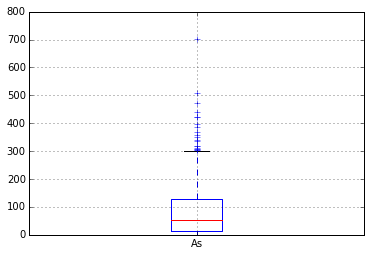

In [55]:
well_data.boxplot(column='As')

Do you remember what a boxplot shows? I found this next picture on stackoverflow.  No need to import. Just for your reference.  
http://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers


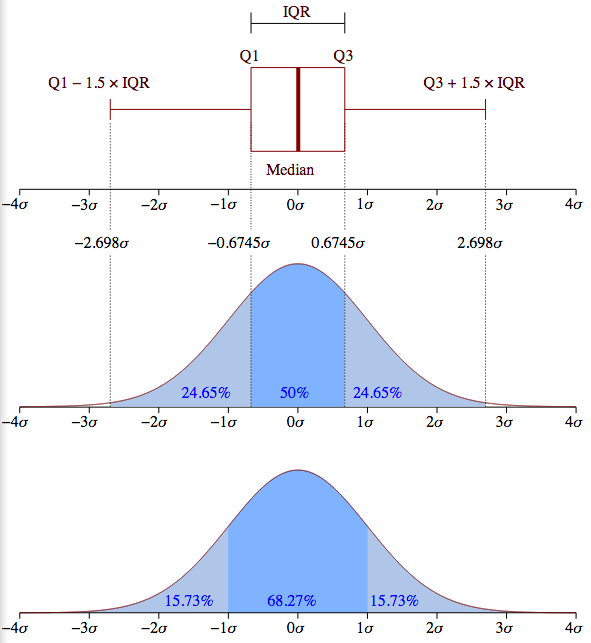

In [57]:
from IPython.display import Image
Image(filename='boxplot_structure.png',width=600)

But we really want two boxplots.  One for people who drink and one for people who don't drink.  I wasn't sure how to do it?  So I googled pandas boxplot.  Here are two of the links I got.  See if you can figure it out!  If you scroll down on the first link you should find the answer....


http://pandas-docs.github.io/pandas-docs-travis/visualization.html#box-plots

http://stackoverflow.com/questions/23232989/boxplot-stratified-by-column-in-python-pandas

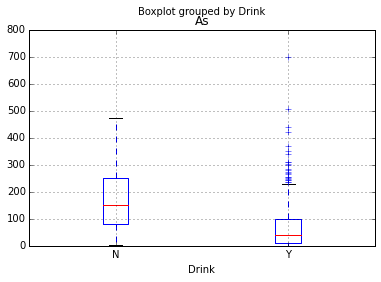

What difference do you notice about the arsenic concentrations of peeople drinking from their wells?

### What wells do people drink from?
For our final exercise. Lets put it together and get data and then see if we can plot it.  I want to know the number of people who are drinking from there wells based on the arsenic concentrations.  Can we do the reverse.  if the arsenic is <10,10-50, and >50 what is the value counts of drinking and not drinking.  I chose these numbers because 10 ppb is the EPA and WHO drinking water limit.  50 ppb is the Bangladesh drinking water limit.  We see negative health effects at 10ppb.    

I would first just try and break the data into 3 groups and print out the results.  So use your way of selecting data and select data based on the levels of arsenic.  To do between 10 and 50 you will need to use an and statement and how to do those is different.  you need to use the logical_and() fucntion.  numpy logical_and(argument1, argument2) works by taking two arguments and then returning what happens the same way as if you did an and.  but it works better.  Remember we did this above.

Three Groups
1.  <10 ppb arsenic
1.  10-50 ppb arsenic
1.  \>50 ppb arsenic

1.  Print out the number of people drinking from wells with arsenic less than 10.  you can use value_counts() and your selection method.

In [112]:
print 'people drinking with <10 \n',well_data['Drink'][well_data.As<=10].value_counts() 


people drinking with <10 
Y    84
N     1
dtype: int64


2.  Next use determine the  people drinking from wells with arsenic more than 50. 


people drinking with >50 
Y    147
N     66
dtype: int64


3.  Now use your logical_and() to determine between 10 and 50.  


people drinking with 10-50 
Y    105
N      4
dtype: int64


This is a bad way of looking at the data.  I would like to make bar plot.  Here is my goal.  Cand we get there?  

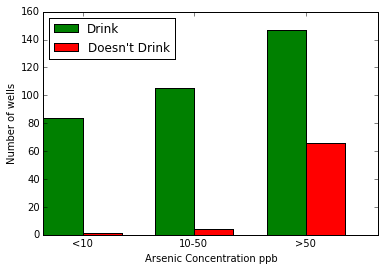

First lets look up bar plot.  http://matplotlib.org/examples/api/barchart_demo.html  This is the example on all the web pages.   We can make sense of it.  Lets do one step at a time.  What plt.bar wants is (x,y,width).  lets do it for As<10 first.  Here is our data again.  

In [122]:
print 'people drinking with <10 \n',well_data['Drink'][well_data.As<=10].value_counts() 

people drinking with <10 
Y    84
N     1
dtype: int64


So we want to plot 84 Drink, 1 Doesn't drink.  I will do it longhand first time.

<Container object of 1 artists>

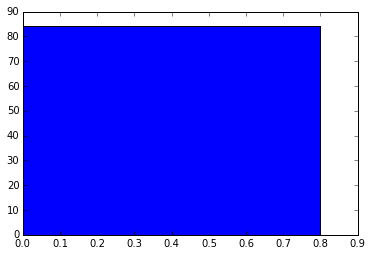

In [74]:
fig,ax=plt.subplots()
ax.bar(0,84)

The default width is 0.8 starting from 0.  Now we need to add the doesn't drink.  

<Container object of 1 artists>

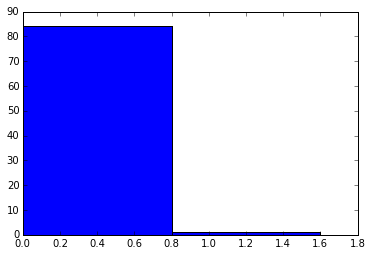

In [75]:
fig,ax=plt.subplots()
ax.bar(0,84)
ax.bar(0.8,1)

Now we need to add colors and labels for a legend.  

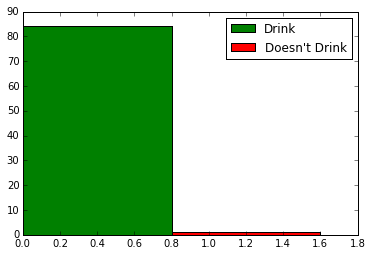

In [77]:
fig,ax=plt.subplots()
ax.bar(0,84,color='g',label='Drink')
ax.bar(0.8,1,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

this is a disaster.  We can't hard wire it all. We need to be better in our programming and be what people call pythonic.  The first trick is setting this fig,ax=plt.subplots()   this will help us get access to all parts of the graph later on and is just telling the program to make one plot in one location. Later in the course we will do multiple subplots.  now instead of setting the x-axis to zero lets use np.arange.  Then also lets set the width. We will also make the second bar start at one width  

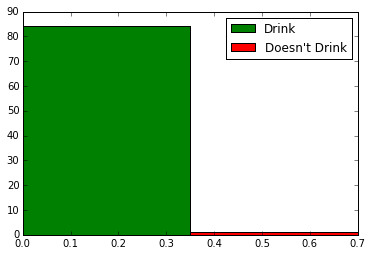

In [78]:
fig,ax=plt.subplots() 
width=0.35
xvalues=np.arange(1)
ax.bar(xvalues,84,width,color='g',label='Drink')
ax.bar(xvalues+width,1,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

Now we are starting to make progress.  But we need the other two sets of bars.  We will need a set of yes and no values.  so we need yes[0],yes[1],yes[2] representing our values.  I would make a nump array of zeros and then fill it in.  So to make a numpy array of zeros.  then fill in the array.  we know the length has to be three.

In [79]:
yes=np.zeros(3)
print yes

[ 0.  0.  0.]


Now do the same for no.  then set each one equal to the correct result that you have above where you printed out the results.  don't print the results like you did above.  set them to yes,no given the correct array spot.  At the end you should now have yes and no set for the three levels.    

[ 0.  0.  0.]


Now I will show you how to add the first yes and no

In [61]:
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() 
print 'yes',yes
print 'no',no

yes [ 84.   0.   0.]
no [ 1.  0.  0.]


Now can you do the other two?

[  84.  105.  147.] [  1.   4.  66.]


Now we can do a bar plot of yes and no.  Go copy and past your barplot code from above.  but now make the x-axis have an np.arange of 3 b/c we want 3 locations.  And don't use the hardwired number put in your new yes and no arrays you just made.

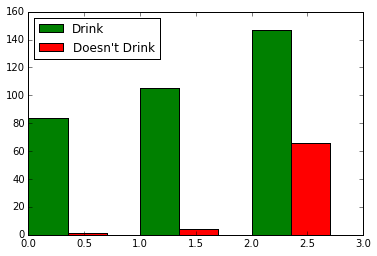

Now you are looking great with a wonderful graph.  lets label everything.  We just need an x-axis labeled correctly.  Also, I would put all the code in one cell so it always works smoothly.  If we go back to our webpage with the example we can use ax.set_xticks(xvalues+width) to get us the xticks we want.  then we can add ax.set_xticklabels(('names','names','names')).  We can also use ax.set_xlabel() and ax.set_ylabel()

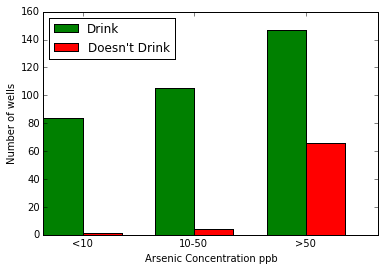

Now that is a great looking graph. You just need to add a figure caption.  I would write something like

Number of wells categorized by if the respondents drink or don't drink from the well and stratified by arsenic concentration.

As a total bonus and if you have time you could change it from the number of wells to the proportion of wells in each category.  

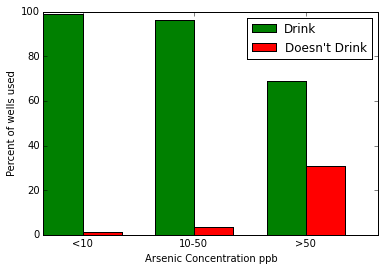

I thought it might be nice to stack the bars since they add up to 100..... See http://matplotlib.org/examples/pylab_examples/bar_stacked.html  It is "easy"  I used the bottom keyword. Then I removed the width offset and tweaked a few other things

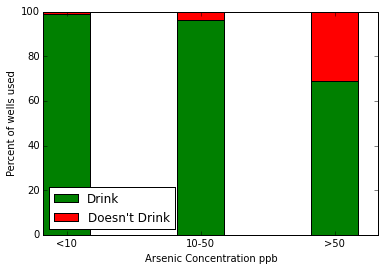

### Answers

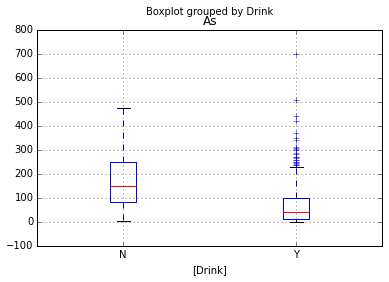

In [100]:
well_data.boxplot(column='As',by='Drink')

In [117]:
print 'people drinking with <10 \n',well_data['Drink'][well_data.As<=10].value_counts() 

people drinking with <10 
Y    84
N     1
dtype: int64


In [118]:
print '\npeople drinking with >50 \n',well_data['Drink'][well_data.As>=50].value_counts() 


people drinking with >50 
Y    147
N     66
dtype: int64


In [95]:
print '\npeople drinking with 10-50 \n',well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts() 



people drinking with 10-50 
Y    105
N      4
dtype: int64


In [96]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() 
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() 
print yes,no

[  84.  105.  147.] [  1.   4.  66.]


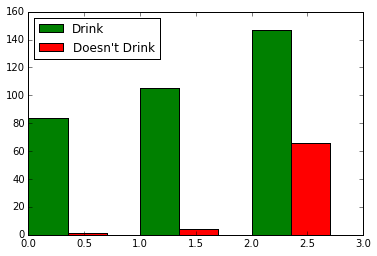

In [173]:
fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')

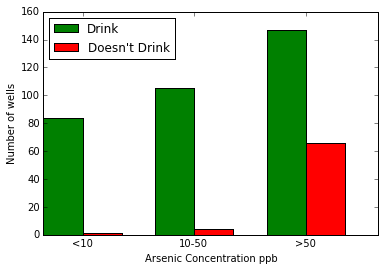

In [99]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() 
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() 

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Number of wells')

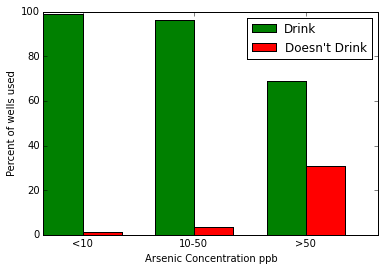

In [94]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() / well_data.As[well_data.As<=10].count() *100.
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()\
            /well_data.As[np.logical_and(well_data.As<=50,well_data.As>=10)].count() *100.
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() /well_data.As[well_data.As>=50].count() *100.

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues+width,no,width,color='r',label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc='best')
ax.set_xticks(xvalues+width)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')

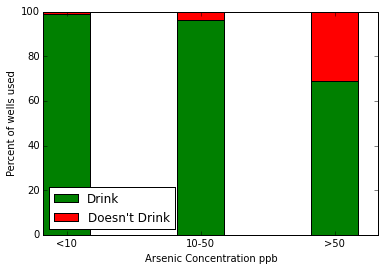

In [105]:
yes=np.zeros(3)
no=np.zeros(3)
yes[0],no[0]=well_data['Drink'][well_data.As<=10].value_counts() / well_data.As[well_data.As<=10].count() *100.
yes[1],no[1]=well_data['Drink'][np.logical_and(well_data.As<=50,well_data.As>=10)].value_counts()\
            /well_data.As[np.logical_and(well_data.As<=50,well_data.As>=10)].count() *100.
yes[2],no[2]=well_data['Drink'][well_data.As>=50].value_counts() /well_data.As[well_data.As>=50].count() *100.

fig,ax=plt.subplots(1,1) 
width=0.35
xvalues=np.arange(3)
ax.bar(xvalues,yes,width,color='g',label='Drink')
ax.bar(xvalues,no,width,color='r',bottom=yes,label="Doesn't Drink") #I did double quotes so I could print the single quote
ax.legend(loc=3)  #You can try numbers 1-8 for location. see http://matplotlib.org/1.3.1/users/legend_guide.html
ax.set_xticks(xvalues+width/2)
ax.set_xticklabels(('<10','10-50','>50'))
ax.set_xlabel('Arsenic Concentration ppb')
ax.set_ylabel('Percent of wells used')